In [1]:
import numpy as np
import scipy
import scipy.io
import math
import matplotlib.pyplot as plt
import time

In [2]:
def encontrar_primeiro(item, vec):
    for i in range(len(vec)):
        if math.fabs(item) == math.fabs(vec[i]):
            return i
    return -1

In [3]:
def power_method(args):
    A, n, TOL, N, x = args
    k = 1
    x_p = x[encontrar_primeiro(np.linalg.norm(x, np.inf), x)]
    x = x/x_p
    while(k <= N):
        y = np.matmul(A, x)
        y_p = y[encontrar_primeiro(np.linalg.norm(y, np.inf), y)]
        u = y_p
        if y_p ==0:
            print('Autovetor', x)
            print('Autovalor 0')
            break;
        ERR = np.linalg.norm(x - (y/y_p), np.inf)
        x = y/y_p
        if ERR < TOL:
            return [u, k, x]
        k += 1
    return [u, k, x]

In [4]:
def gersgorin_max(n, A):
    supremo_raio = []
    quasi_sum_linha = []
    for i in range(n):
        soma = 0
        for j in range(n):
            if(i!=j):
                soma = soma + math.fabs(A[i][i])
        quasi_sum_linha.append(soma)
        
    for i, e in enumerate(np.diag(A)):
        supremo_raio.append(e + quasi_sum_linha[i])
    
    return max(supremo_raio)

No método da potência inverso, vamos usar um $q$ diferente do sugerido por Burden. Como supomos que não há informação sobre um vetor $x^{(0)}$ próximo do autovetor correspondente ao maior autovalor, vamos utilizar os Círculos de Gersgorin para inferir um bom valor inicial para $q$. Como $q$ deve estar próximo do maior autovalor da matriz $A$, vamos usar o ponto de maior valor dentre todos pontos onde algum Círculo de Gersgorin cruza a reta considerando todos os círculos de Gersgorin.

In [5]:
def inverse_power_method(args):
    A, n, TOL, N, x = args
    q = gersgorin_max(n, A)
    k = 1
    x_p = x[encontrar_primeiro(np.linalg.norm(x, np.inf), x)]
    x = x/x_p
    AqI = A - q*np.identity(n)
    while(k <= N):
        try:
            y = np.linalg.solve(AqI, x)
        except:
            print('q é um autovalor: ', q)
            break;
        y_p = y[encontrar_primeiro(np.linalg.norm(y, np.inf), y)]
        u = y_p
        ERR = np.linalg.norm(x - (y/y_p), np.inf)
        x = y/y_p
        if ERR < TOL:
            u = (1/u) + q
            return [u, k, q]
        k += 1
        
    u = (1/u) + q
    return [u, k, q]

In [148]:
def QR(args):
    A, n, TOL, N, dummy = args
    k = 1
    Ak_1 = A
    Uk_1 = np.identity(n)
    stop = False
    while(k <= N):
        Q, R = np.linalg.qr(Ak_1)
        Ak = np.matmul(R, Q)
        Ak_1 = Ak
        Uk = np.matmul(Uk_1, Q)
        Uk_1 = Uk
        k += 1
        stop = True
        index = np.where(np.diag(Ak)==max(np.diag(Ak)))[0][0]
        if index < n-1:
            if math.fabs(Ak[index][index+1]) > TOL:
                stop = False
        else:
            if math.fabs(Ak[index][index-1]) > TOL:
                stop = False
        if stop:
            break;
    return [max(np.diag(Ak)), k, dummy]

In [7]:
def executor_timer(f, args, tcpu, iter_, autoval_):
    start = time.time()
    res = f(args)
    end = time.time()
    tcpu.append(end - start)
    autoval_.append(res[0])
    iter_.append(res[1])    

In [8]:
def executor_loops(argumentos, h, g, tcpu, iter_, autoval_):
    av_ = []
    tc_ = []
    it_ = [] 
    for arg in argumentos:
        g(h, arg, tc_, it_, av_)
    tcpu.append(tc_)
    iter_.append(it_)
    autoval_.append(av_)

In [136]:
LF10 = scipy.sparse.csr_matrix(scipy.io.mmread('matrizes/LF10.mtx'))
bcsstk01 = scipy.sparse.csr_matrix(scipy.io.mmread('matrizes/bcsstk01.mtx'))
nos4 = scipy.sparse.csr_matrix(scipy.io.mmread('matrizes/nos4.mtx'))
bcsstm05 = scipy.sparse.csr_matrix(scipy.io.mmread('matrizes/bcsstm05.mtx'))
Trefethen_300 = scipy.sparse.csr_matrix(scipy.io.mmread('matrizes/Trefethen_300.mtx'))
_494_bus = scipy.sparse.csr_matrix(scipy.io.mmread('matrizes/494_bus.mtx'))

## Visualização das Matrizes

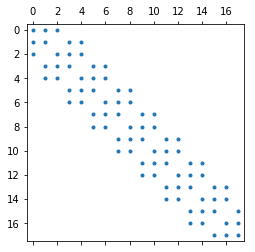

In [220]:
plt.spy(LF10, precision='present', marker='o', markersize=3)

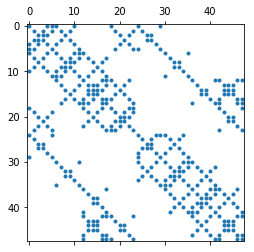

In [221]:
plt.spy(bcsstk01, precision='present', marker='o', markersize=3)

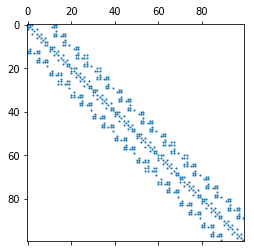

In [222]:
plt.spy(nos4, precision='present', markersize=1)

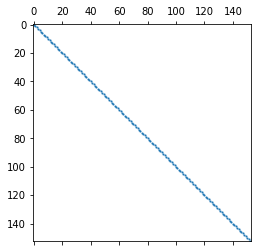

In [223]:
plt.spy(bcsstm05, precision='present', markersize=1)

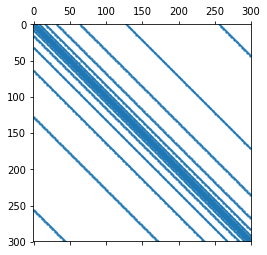

In [224]:
plt.spy(Trefethen_300, precision='present', markersize=1)

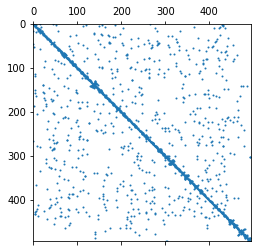

In [225]:
plt.spy(_494_bus, precision='present', marker='o', markersize=1)

## Power Method

In [160]:
tempo_CPU_PM = []
iteracoes_PM = []
autovalores_PM = []

In [161]:
TOL_PM = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.00000001]

In [162]:
N_ = 10000
for tol in TOL_PM:
    argumentos_LF10 = [np.array(LF10.todense()), LF10.shape[0], tol, N_, np.ones(LF10.shape[0])]
    argumentos_bcsstk01 = [np.array(bcsstk01.todense()), bcsstk01.shape[0], tol, N_, np.ones(bcsstk01.shape[0])]
    argumentos_nos4 = [np.array(nos4.todense()), nos4.shape[0], tol, N_, np.ones(nos4.shape[0])]
    argumentos_bcsstm05 = [np.array(bcsstm05.todense()), bcsstm05.shape[0], tol, N_, np.ones(bcsstm05.shape[0])]
    argumentos_Trefethen_300 = [np.array(Trefethen_300.todense()), Trefethen_300.shape[0], tol, N_, np.ones(Trefethen_300.shape[0])]
    argumentos_494_bus = [np.array(_494_bus.todense()), _494_bus.shape[0], tol, N_, np.ones(_494_bus.shape[0])]
    args_ = [argumentos_LF10, argumentos_bcsstk01, argumentos_nos4, argumentos_bcsstm05, argumentos_Trefethen_300, argumentos_494_bus]
    executor_loops(args_, power_method, executor_timer, tempo_CPU_PM, iteracoes_PM, autovalores_PM)

In [226]:
a = 0
for t_ in tempo_CPU_PM:
    a += sum(t_)
a

1.8921012878417969

In [163]:
tempo_CPU_PM

[[0.0, 0.0, 0.0009965896606445312, 0.0, 0.0029888153076171875, 0.0],
 [0.0,
  0.002991914749145508,
  0.0029914379119873047,
  0.002992391586303711,
  0.0069806575775146484,
  0.0009984970092773438],
 [0.0010235309600830078,
  0.011997461318969727,
  0.004986286163330078,
  0.005984067916870117,
  0.06180739402770996,
  0.0009980201721191406],
 [0.000997304916381836,
  0.011968135833740234,
  0.005983829498291016,
  0.00498652458190918,
  0.1845076084136963,
  0.002991914749145508],
 [0.0009965896606445312,
  0.01795196533203125,
  0.007982015609741211,
  0.007979154586791992,
  0.28234148025512695,
  0.002991914749145508],
 [0.000997304916381836,
  0.02294754981994629,
  0.012969017028808594,
  0.00897979736328125,
  0.43452930450439453,
  0.0060160160064697266],
 [0.008994579315185547,
  0.036972999572753906,
  0.024971961975097656,
  0.014995098114013672,
  0.6732749938964844,
  0.007037162780761719]]

In [164]:
iteracoes_PM

[[6, 4, 8, 5, 5, 2],
 [13, 44, 44, 24, 37, 2],
 [18, 198, 93, 48, 306, 3],
 [24, 352, 148, 71, 864, 24],
 [29, 506, 217, 95, 1423, 30],
 [35, 660, 330, 118, 1982, 36],
 [355, 968, 639, 165, 3100, 47]]

In [165]:
autovalores_PM

[[295240.5679593107,
  3026750869.0485363,
  0.7570105239945437,
  0.927954241357,
  1992.4971269539517,
  2220.8739999925438],
 [302763.8003306611,
  3015173004.1829395,
  0.8495452096038754,
  0.927954241357,
  1989.595330135093,
  2220.8739999925438],
 [303286.34972723137,
  3015178471.8322573,
  0.8496900380420218,
  0.927954241357,
  1987.6411735998722,
  2220.956313814004],
 [303357.92683792196,
  3015179028.114388,
  0.8491961376501183,
  0.927954241357,
  1987.3017983636037,
  30005.141764126427],
 [303363.8084856246,
  3015179083.721749,
  0.8491414163462694,
  0.927954241357,
  1987.2749475061883,
  30005.141764126427],
 [303364.61723534623,
  3015179089.280332,
  0.8491378233507709,
  0.927954241357,
  1987.2723739950984,
  30005.141764126427],
 [333192.3953189063,
  3015179089.891517,
  0.8491377837807588,
  0.927954241357,
  1987.2720934429913,
  30005.141764126427]]

## Inverse Power Method

In [175]:
tempo_CPU_IPM = []
iteracoes_IPM = []
autovalores_IPM = []

In [176]:
TOL_ = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.00000001]

In [177]:
N_ = 10000
for tol in TOL_:
    argumentos_LF10 = [np.array(LF10.todense()), LF10.shape[0], tol, N_, np.ones(LF10.shape[0])]
    argumentos_bcsstk01 = [np.array(bcsstk01.todense()), bcsstk01.shape[0], tol, N_, np.ones(bcsstk01.shape[0])]
    argumentos_nos4 = [np.array(nos4.todense()), nos4.shape[0], tol, N_, np.ones(nos4.shape[0])]
    argumentos_bcsstm05 = [np.array(bcsstm05.todense()), bcsstm05.shape[0], tol, N_, np.ones(bcsstm05.shape[0])]
    argumentos_Trefethen_300 = [np.array(Trefethen_300.todense()), Trefethen_300.shape[0], tol, N_, np.ones(Trefethen_300.shape[0])]
    argumentos_494_bus = [np.array(_494_bus.todense()), _494_bus.shape[0], tol, N_, np.ones(_494_bus.shape[0])]
    args_ = [argumentos_LF10, argumentos_bcsstk01, argumentos_nos4, argumentos_bcsstm05, argumentos_Trefethen_300, argumentos_494_bus]
    executor_loops(args_, inverse_power_method, executor_timer, tempo_CPU_IPM, iteracoes_IPM, autovalores_IPM)

In [178]:
a = 0
for t_ in tempo_CPU_IPM:
    a += sum(t_)
a

173.67775869369507

In [179]:
tempo_CPU_IPM

[[0.0,
  0.0009958744049072266,
  0.00499272346496582,
  0.010964155197143555,
  0.040891170501708984,
  0.1077125072479248],
 [0.002981424331665039,
  0.003989219665527344,
  0.00399017333984375,
  0.009975910186767578,
  0.049895524978637695,
  0.13980913162231445],
 [0.0039882659912109375,
  0.018949508666992188,
  0.07880592346191406,
  0.10184788703918457,
  0.3450133800506592,
  0.12071561813354492],
 [0.010483503341674805,
  0.33589792251586914,
  0.36060047149658203,
  0.7622225284576416,
  3.554126739501953,
  27.95303463935852],
 [0.010001420974731445,
  0.7176694869995117,
  0.8339102268218994,
  2.3249423503875732,
  8.60472583770752,
  30.21100878715515],
 [0.015972375869750977,
  0.7515027523040771,
  1.134042739868164,
  2.995898962020874,
  8.370194673538208,
  32.82721209526062],
 [0.11967110633850098,
  0.6907641887664795,
  1.2360429763793945,
  2.6888654232025146,
  8.57815670967102,
  37.545292377471924]]

In [180]:
iteracoes_IPM

[[1, 1, 1, 1, 1, 1],
 [69, 37, 1, 1, 1, 1],
 [128, 250, 647, 367, 369, 1],
 [193, 4128, 2866, 2954, 3653, 7125],
 [257, 10001, 5509, 6696, 10001, 7938],
 [322, 10001, 8464, 10001, 10001, 8755],
 [2889, 10001, 10001, 10001, 10001, 10001]]

In [181]:
autovalores_IPM

[[88416.243274556,
  3545753575.1734924,
  0.23687001181192358,
  0.9279542413570141,
  1995.9936972241849,
  2198.670196376741],
 [304588.25378020573,
  3288437869.953079,
  0.23687001181192358,
  0.9279542413570141,
  1995.9936972241849,
  2198.670196376741],
 [302610.591871622,
  2989649614.2232056,
  0.815296339590418,
  0.9279542413570141,
  1994.3177966288058,
  2198.670196376741],
 [303284.50668113213,
  3015176708.274246,
  0.8497698044680462,
  0.9279542413570141,
  1991.0592704870505,
  30219.505989840254],
 [303356.54755927436,
  3015178844.263687,
  0.8494326767950113,
  0.9279542413570141,
  1989.7062605199171,
  30023.122620910406],
 [303363.9065220631,
  3015178844.263687,
  0.8491662313319992,
  0.9279542413570141,
  1989.7062605199171,
  30006.640688590705],
 [333192.38846333977,
  3015178844.263687,
  0.8491463182890087,
  0.9279542413570141,
  1989.7062605199171,
  30005.175790991634]]

## QR

In [205]:
tempo_CPU_QR = []
iteracoes_QR = []
autovalores_QR = []

In [195]:
TOL_QR = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.00000001]

In [206]:
N_ = 1000
for tol in TOL_QR:
    argumentos_LF10 = [np.array(LF10.todense()), LF10.shape[0], tol, N_, np.ones(LF10.shape[0])]
    argumentos_bcsstk01 = [np.array(bcsstk01.todense()), bcsstk01.shape[0], tol, N_, np.ones(bcsstk01.shape[0])]
    argumentos_nos4 = [np.array(nos4.todense()), nos4.shape[0], tol, N_, np.ones(nos4.shape[0])]
    argumentos_bcsstm05 = [np.array(bcsstm05.todense()), bcsstm05.shape[0], tol, N_, np.ones(bcsstm05.shape[0])]
    argumentos_Trefethen_300 = [np.array(Trefethen_300.todense()), Trefethen_300.shape[0], tol, N_, np.ones(Trefethen_300.shape[0])]
    argumentos_494_bus = [np.array(_494_bus.todense()), _494_bus.shape[0], tol, N_, np.ones(_494_bus.shape[0])]
    args_ = [argumentos_LF10, argumentos_bcsstk01, argumentos_nos4, argumentos_bcsstm05, argumentos_Trefethen_300, argumentos_494_bus]
    executor_loops(args_, QR, executor_timer, tempo_CPU_QR, iteracoes_QR, autovalores_QR)

In [207]:
a = 0
for t_ in tempo_CPU_QR:
    a += sum(t_)
a

62.93862819671631

In [208]:
iteracoes_QR

[[144, 856, 2, 2, 10, 2],
 [168, 1001, 2, 2, 14, 2],
 [193, 1001, 2, 2, 18, 62],
 [217, 1001, 18, 2, 22, 93],
 [242, 1001, 19, 2, 1001, 99],
 [266, 1001, 19, 2, 1001, 105],
 [315, 1001, 984, 2, 1001, 116]]

In [209]:
autovalores_QR

[[333192.3962415181,
  3015179089.897691,
  0.5952654678943575,
  0.927954241357,
  1986.8691599102158,
  28221.223600431913],
 [333192.3962418001,
  3015179089.897691,
  0.5952654678943575,
  0.927954241357,
  1986.7497647124178,
  28221.223600431913],
 [333192.39624180296,
  3015179089.897691,
  0.5952654678943575,
  0.927954241357,
  1986.3594722577584,
  29106.508162197013],
 [333192.39624180296,
  3015179089.897691,
  0.8212692618917131,
  0.927954241357,
  1985.234532266744,
  30005.14176261468],
 [333192.39624180296,
  3015179089.897691,
  0.8233254415779223,
  0.927954241357,
  1987.1964506608892,
  30005.141764114353],
 [333192.39624180296,
  3015179089.897691,
  0.8233254415779223,
  0.927954241357,
  1987.1964506608892,
  30005.141764126343],
 [333192.39624180296,
  3015179089.897691,
  0.849137783780574,
  0.927954241357,
  1987.1964506608892,
  30005.141764126438]]